<a href="https://colab.research.google.com/github/vkthakur90/jupyter_notebooks/blob/master/Colab_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Notebook created using Google colab

## Imports

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.linalg as la

## Creating sample input data

In [0]:
x = np.random.uniform(low = -50, high = 50, size = 100 * 100 + 1)
err = np.random.normal(loc = 0, scale = 5, size = 100 * 100 + 1)

In [3]:
data = pd.DataFrame(dict(x = x, e = err))
display(data.head())

,e,x
0,-4.016060,-23.459659
1,0.148059,-28.091763
2,-1.814835,-18.321986
3,3.793773,7.359551
4,5.158347,39.170301


## Creating model from data

\begin{equation}
    y = 10 + 15 x - 25 x^2
\end{equation}

In [4]:
data.eval('y = 10 + 15 * x - 25 * x ** 2 + e', inplace = True)
display(data.head())

,e,x,y
0,-4.016060,-23.459659,-14104.801194
1,0.148059,-28.091763,-20139.907638
2,-1.814835,-18.321986,-8659.023534
3,3.793773,7.359551,-1229.887866
4,5.158347,39.170301,-37755.099053


## Visualizing Raw Data

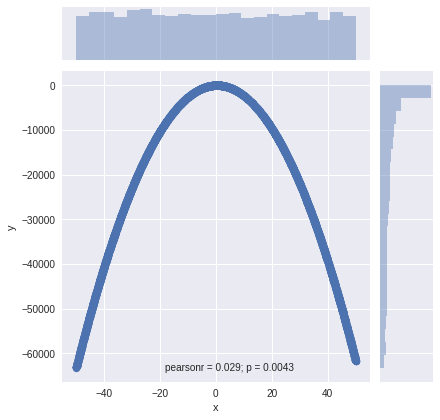

In [5]:
_ = sns.jointplot(x = 'x', y = 'y', data = data)

## Fitting linear model

In [6]:
design_matrix = pd.DataFrame({
    ('features', '1') : data['x'].apply(lambda x: 1),
    ('features', 'x') : data['x'],
    ('features', 'x**2') : data['x'].apply(lambda x: x**2),
    ('labels', 'y') : data['y']
})

display(design_matrix.head())

features                                labels
         1          x         x**2             y
0        1 -23.459659   550.355610 -14104.801194
1        1 -28.091763   789.147170 -20139.907638
2        1 -18.321986   335.695157  -8659.023534
3        1   7.359551    54.162996  -1229.887866
4        1  39.170301  1534.312477 -37755.099053

## Calculation of parameters using design matrix

In [0]:
X = np.matrix(design_matrix['features'])
Y = np.matrix(design_matrix['labels'])

In [0]:
C = la.inv(X.T * X) * (X.T * Y)

In [9]:
pd.DataFrame(C.T, columns = ['Intercept', 'x', 'I(x**2)'], index = ['coeff'])

,Intercept,x,I(x**2)
coeff,9.996569,14.999023,-24.999945
